In [ ]:
pip install pandas scikit-learn nltk matplotlib wordcloud


In [3]:
import pandas as pd

# Load the Excel file (adjust the file path accordingly)
file_path = "test2.xlsx"
xls = pd.ExcelFile(file_path)

# Load Sheet 2 which contains the reviews
df = pd.read_excel(file_path, sheet_name="Sheet2")

# Check the first few rows
print(df.head())


                                          Phone Name  \
0  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
1  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
2  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
3  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
4  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   

                                            Comments Calculated_Sentiment  
0  Really impressed with the screen quality and s...             Positive  
1  Really impressed with the screen quality and s...             Positive  
2  Battery life is excellent, and performance is ...             Positive  
3          No issues so far, feels almost brand new!             Positive  
4  Battery life is excellent, and performance is ...             Positive  


In [5]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a custom preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply preprocessing to the 'Comments' column
df['Cleaned_Comments'] = df['Comments'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()
term_matrix = vectorizer.fit_transform(df['Cleaned_Comments'])

# Get term frequencies
terms = vectorizer.get_feature_names_out()
frequencies = term_matrix.sum(axis=0).tolist()[0]

# Create a DataFrame of term frequencies
term_freq_df = pd.DataFrame({'Term': terms, 'Frequency': frequencies})
term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False)
print(term_freq_df.head(20))


             Term  Frequency
3469        phone      10272
3794      quality       7750
2019         good       6008
404       battery       5836
4193       screen       5521
3439  performance       5157
2065        great       3718
2670         life       3012
3125          new       2980
668        camera       2972
5504        works       2927
3669        price       2874
1695          far       2790
3857       really       2750
1583    excellent       2723
251          apps       2682
563         brand       2669
2491       issues       2633
5281        value       2628
666          came       2618


In [11]:
attributes = {
    "Performance": ["performance", "speed", "smooth", "processor", "apps"],
    "Battery": ["battery", "life", "charge", "charging", "power"],
    "Camera": ["camera", "photo", "picture", "image", "video"],
    "Screen": ["screen", "display", "resolution", "brightness"],
    "Price": ["price", "cost", "value", "expensive", "cheap"],
    "Brand": ["brand", "name", "reputation", "company"]
}


In [13]:
attribute_freq = {attr: 0 for attr in attributes}

# Sum the frequencies of terms under each attribute
for attr, terms in attributes.items():
    attribute_freq[attr] = term_freq_df[term_freq_df['Term'].isin(terms)]['Frequency'].sum()

# Convert to a DataFrame for visualization
attribute_freq_df = pd.DataFrame(list(attribute_freq.items()), columns=['Attribute', 'Frequency'])
print(attribute_freq_df)


     Attribute  Frequency
0  Performance      13012
1      Battery       9080
2       Camera       3075
3       Screen       5669
4        Price       5598
5        Brand       2690


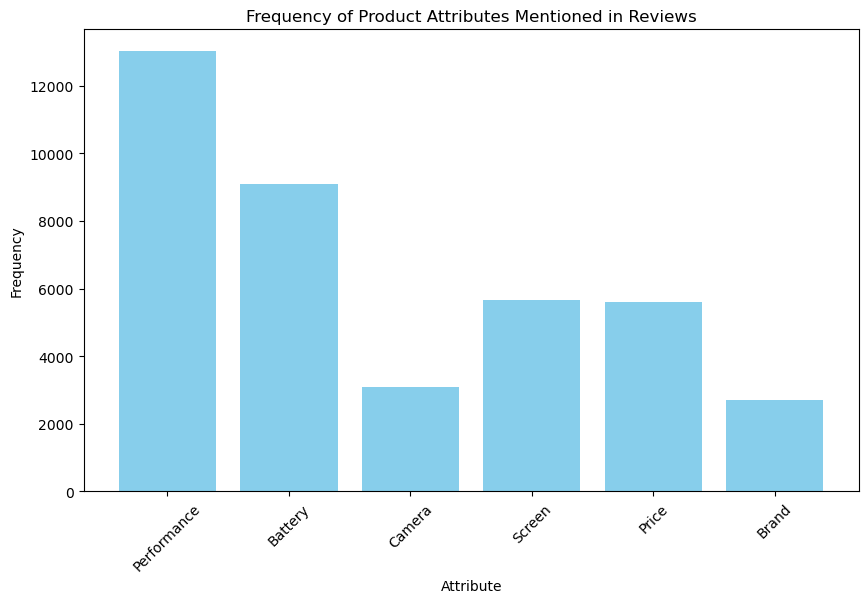

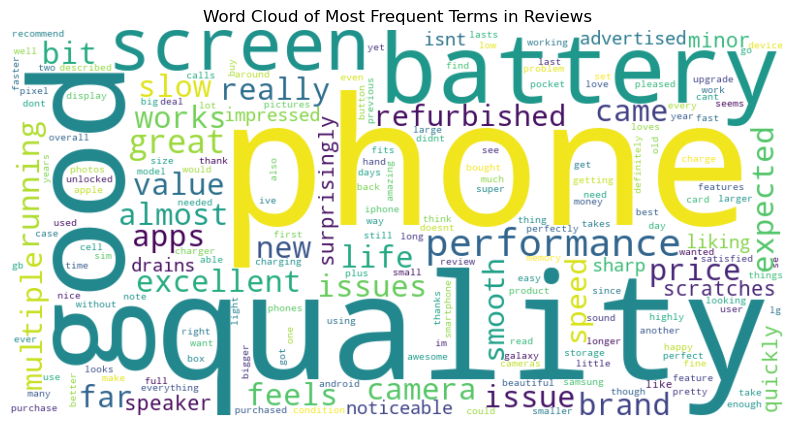

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Bar chart for attribute frequencies
plt.figure(figsize=(10, 6))
plt.bar(attribute_freq_df['Attribute'], attribute_freq_df['Frequency'], color='skyblue')
plt.title('Frequency of Product Attributes Mentioned in Reviews')
plt.xlabel('Attribute')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud of the most frequent terms
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(term_freq_df['Term'], term_freq_df['Frequency'])))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms in Reviews')
plt.show()
